In [5]:
import os
import cv2
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers, models
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

**DATA PREPROCESSING**

In [7]:
def load_and_preprocess_data(folder_path):
    images = []
    labels = []

    for label in os.listdir(folder_path):
        label_path = os.path.join(folder_path, label)

        if os.path.isdir(label_path):
            for filename in os.listdir(label_path):
                img_path = os.path.join(label_path, filename)
                img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
                img = cv2.resize(img, (128, 128))  
                img = img.astype('float32') / 255.0 
                images.append(img)
                labels.append(int(label))
                
    return np.array(images), np.array(labels)
train_data_path = "/kaggle/input/arabic-letters-classification/Final_Arabic_Alpha_dataset/Final_Arabic_Alpha_dataset/train"
test_data_path = "/kaggle/input/arabic-letters-classification/Final_Arabic_Alpha_dataset/Final_Arabic_Alpha_dataset/test"


In [8]:
x_train, y_train = load_and_preprocess_data(train_data_path)
x_test, y_test = load_and_preprocess_data(test_data_path)
num_classes = len(np.unique(y_train))

y_train_one_hot = to_categorical(y_train, num_classes)
y_test_one_hot = to_categorical(y_test, num_classes)
# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x_train, y_train_one_hot, test_size=0.2, random_state=42)

**DATA VISUALIZATION**

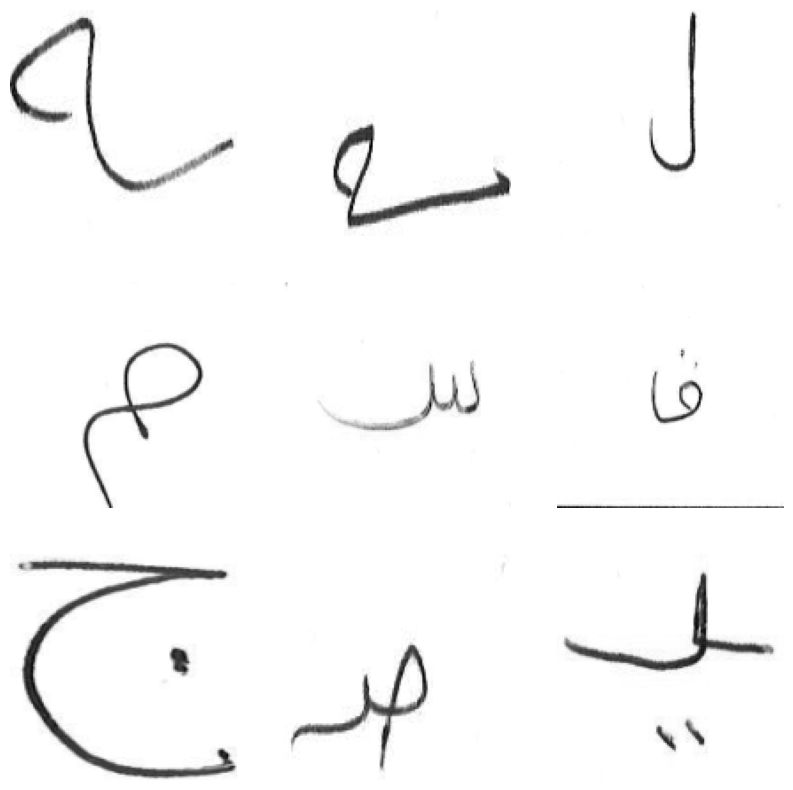

In [9]:
plt.figure(figsize=(10, 10))

# Assuming x_train contains image data and y_train contains labels
# We will display the first 9 images from x_train
for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(x_train[i].reshape(128, 128), cmap='gray')  # Adjust according to your image size
    # Display the label
    plt.axis("off")

plt.show()  

**MODEL DEFINITION**

In [10]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 1))) #convolutional 
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Flatten())

model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dropout(0.5)),

model.add(layers.Dense(num_classes, activation='softmax'))

model.summary()
model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 126, 126, 32)      320       
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 63, 63, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 61, 61, 64)        18496     
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 30, 30, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 28, 28, 128)       73856     
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 14, 14, 128)      

**TRAINING**

In [11]:
history = model.fit(x_train.reshape((-1, 128, 128, 1)), y_train, epochs=50, batch_size=128, validation_split=0.2)

Epoch 1/50
213/213 [==============================] - 14s 55ms/step - loss: 4.1770 - accuracy: 0.0132 - val_loss: 4.1749 - val_accuracy: 0.0142
Epoch 2/50
213/213 [==============================] - 11s 52ms/step - loss: 4.1748 - accuracy: 0.0148 - val_loss: 4.1753 - val_accuracy: 0.0138
Epoch 3/50
213/213 [==============================] - 11s 53ms/step - loss: 4.0644 - accuracy: 0.0366 - val_loss: 3.5656 - val_accuracy: 0.1169
Epoch 4/50
213/213 [==============================] - 11s 53ms/step - loss: 3.2671 - accuracy: 0.1514 - val_loss: 2.4738 - val_accuracy: 0.3374
Epoch 5/50
213/213 [==============================] - 11s 53ms/step - loss: 2.3629 - accuracy: 0.3251 - val_loss: 1.7453 - val_accuracy: 0.5048
Epoch 6/50
213/213 [==============================] - 11s 53ms/step - loss: 1.7412 - accuracy: 0.4780 - val_loss: 1.3819 - val_accuracy: 0.5971
Epoch 7/50
213/213 [==============================] - 11s 52ms/step - loss: 1.3200 - accuracy: 0.5916 - val_loss: 1.1705 - val_accuracy:

**TESTING**

In [14]:
test_loss, test_accuracy = model.evaluate(x_test.reshape((-1, 128, 128, 1)), y_test, verbose=2)
print(f"Test Accuracy: {test_accuracy*100:.2f}%")
print(f"Test Loss: {test_loss:.4f}")

266/266 - 1s - loss: 2.2637 - accuracy: 0.7142 - 1s/epoch - 5ms/step
Test Accuracy: 71.42%
Test Loss: 2.2637


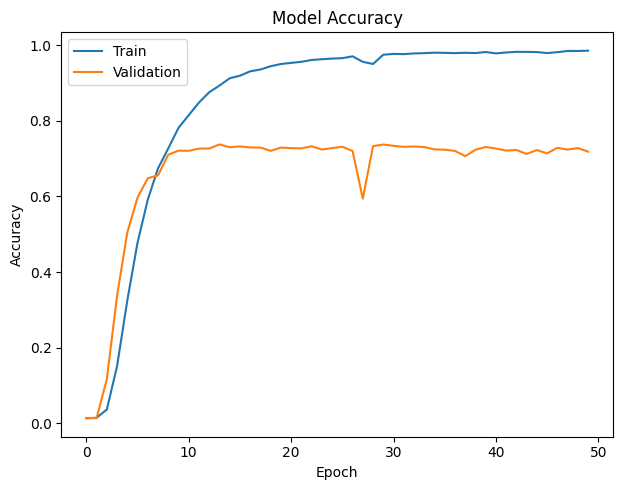

In [15]:
# Plot training & validation accuracy values
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train')
plt.plot(history.history['val_accuracy'], label='Validation')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()

plt.tight_layout()
plt.show()

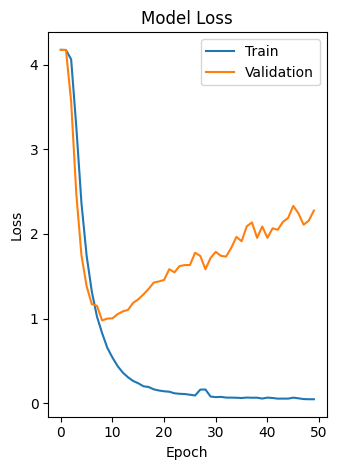

In [16]:
# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train')
plt.plot(history.history['val_loss'], label='Validation')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()

plt.tight_layout()
plt.show()


**PREDICTION**

In [18]:
# Predict the test dataset
predictions = model.predict(x_test)

266/266 [==============================] - 1s 4ms/step


In [20]:
predicted_classes = np.argmax(predictions, axis=1)

In [21]:
true_classes = np.argmax(y_test, axis=1)

**CONFUSION MATRIX**

In [23]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(true_classes, predicted_classes)

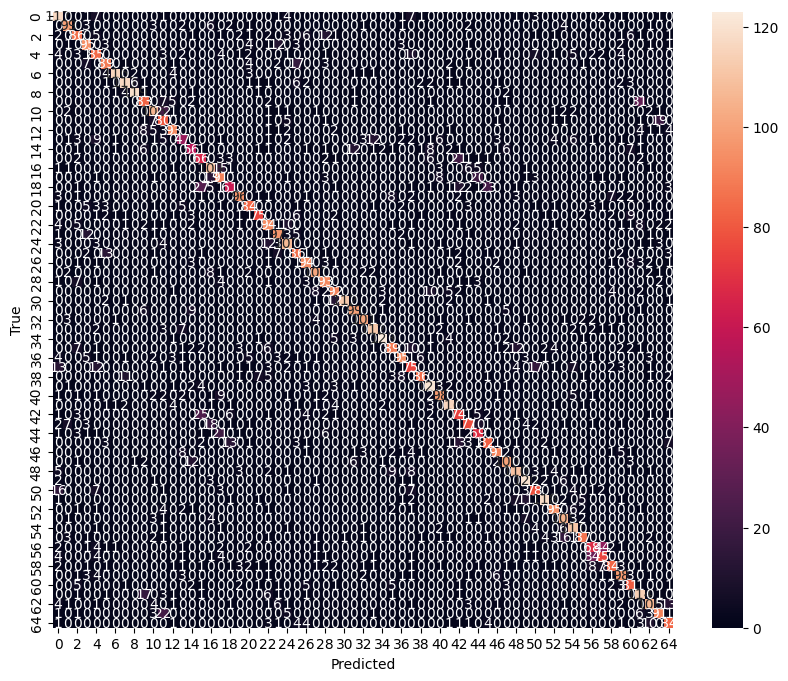

In [24]:
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt="d")
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [25]:
print(classification_report(true_classes,predicted_classes))

              precision    recall  f1-score   support

           0       0.59      0.79      0.68       148
           1       0.81      0.79      0.80       125
           2       0.64      0.65      0.64       133
           3       0.67      0.75      0.71       127
           4       0.54      0.61      0.58       139
           5       0.72      0.70      0.71       128
           6       0.94      0.87      0.91       133
           7       0.84      0.79      0.81       148
           8       0.93      0.92      0.92       130
           9       0.65      0.62      0.63       134
          10       0.73      0.74      0.74       143
          11       0.48      0.68      0.57       118
          12       0.78      0.73      0.75       127
          13       0.56      0.42      0.48       113
          14       0.58      0.50      0.54       112
          15       0.49      0.61      0.54       109
          16       0.64      0.75      0.69       145
          17       0.56    

 **CONVERT TO CSV**

In [26]:
predictions.shape

(8512, 65)

In [34]:
predictions = model.predict(x_test)

img_list = os.listdir(test_data_path)

labels_list = sorted(os.listdir(train_data_path))
print(labels_list)

266/266 [==============================] - 1s 4ms/step
['0', '1', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '2', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '3', '30', '31', '32', '33', '34', '35', '36', '37', '38', '39', '4', '40', '41', '42', '43', '44', '45', '46', '47', '48', '49', '5', '50', '51', '52', '53', '54', '55', '56', '57', '58', '59', '6', '60', '61', '62', '63', '64', '7', '8', '9']


In [49]:
predictions[1][22]
predictions.shape

(8512, 65)

In [50]:
df_predictions = pd.DataFrame(columns=['ID','Label'], dtype=(np.int32,np.int32))
predictions_mod = np.argmax(predictions, 1)

In [63]:
import os
import pandas as pd

# Assuming predictions_mod is an array of predicted labels (0 to num_classes-1)
# and img_list contains the list of image filenames
# Check if the number of predictions matches the number of images
if len(predictions_mod) != len(img_list):
    #raise ValueError("Number of predictions must match the number of images.")

# Create a DataFrame for predictions
 df_predictions = pd.DataFrame({'ID': [], 'Label': []}, dtype=np.int32)

# Iterate through the images and predictions
for idx, image in enumerate(sorted(img_list)):
    if idx < len(predictions_mod):  # Ensure predictions_mod is within bounds
        df2 = pd.DataFrame([[int(image.split(".")[0]), int(labels_list[predictions_mod[idx]])]], columns=['ID','Label'])
        df_predictions = pd.concat([df_predictions, df2])

In [64]:
df_predictions.head()

,ID,Label
0,0,24
0,1,8
0,10,8
0,100,6
0,1000,42


In [65]:
df_predictions.sort_values(by='ID', inplace=True)

In [66]:
df_predictions.reset_index(drop=True)

,ID,Label
0,0,24
1,1,8
2,2,24
3,3,14
4,4,16
...,...,...
8507,10635,17
8508,10636,53
8509,10637,62
8510,10638,16


In [68]:
df_predictions.to_csv('predictions.csv', index=False, header=True) 